In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
#upload file
from google.colab import files

uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
#generate to dataframe

df = pd.read_csv('data.csv')


In [5]:
#show the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
506,0.98765,0.0,12.5,0,0.561,6.980,89.0,2.098,3,320,23.0,396.0,12.0,12.0
507,0.23456,0.0,12.5,0,0.561,6.980,76.0,2.654,3,320,23.0,343.0,25.0,32.0
508,0.44433,0.0,12.5,0,0.561,6.123,98.0,2.987,3,320,23.0,343.0,21.0,54.0
509,0.77763,0.0,12.7,0,0.561,6.222,34.0,2.543,3,329,23.0,343.0,76.0,67.0
510,0.65432,0.0,12.8,0,0.561,6.760,67.0,2.987,3,345,23.0,321.0,45.0,24.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


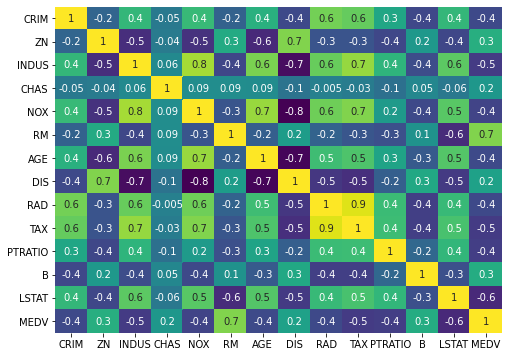

In [9]:
#look the correlation of matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False);

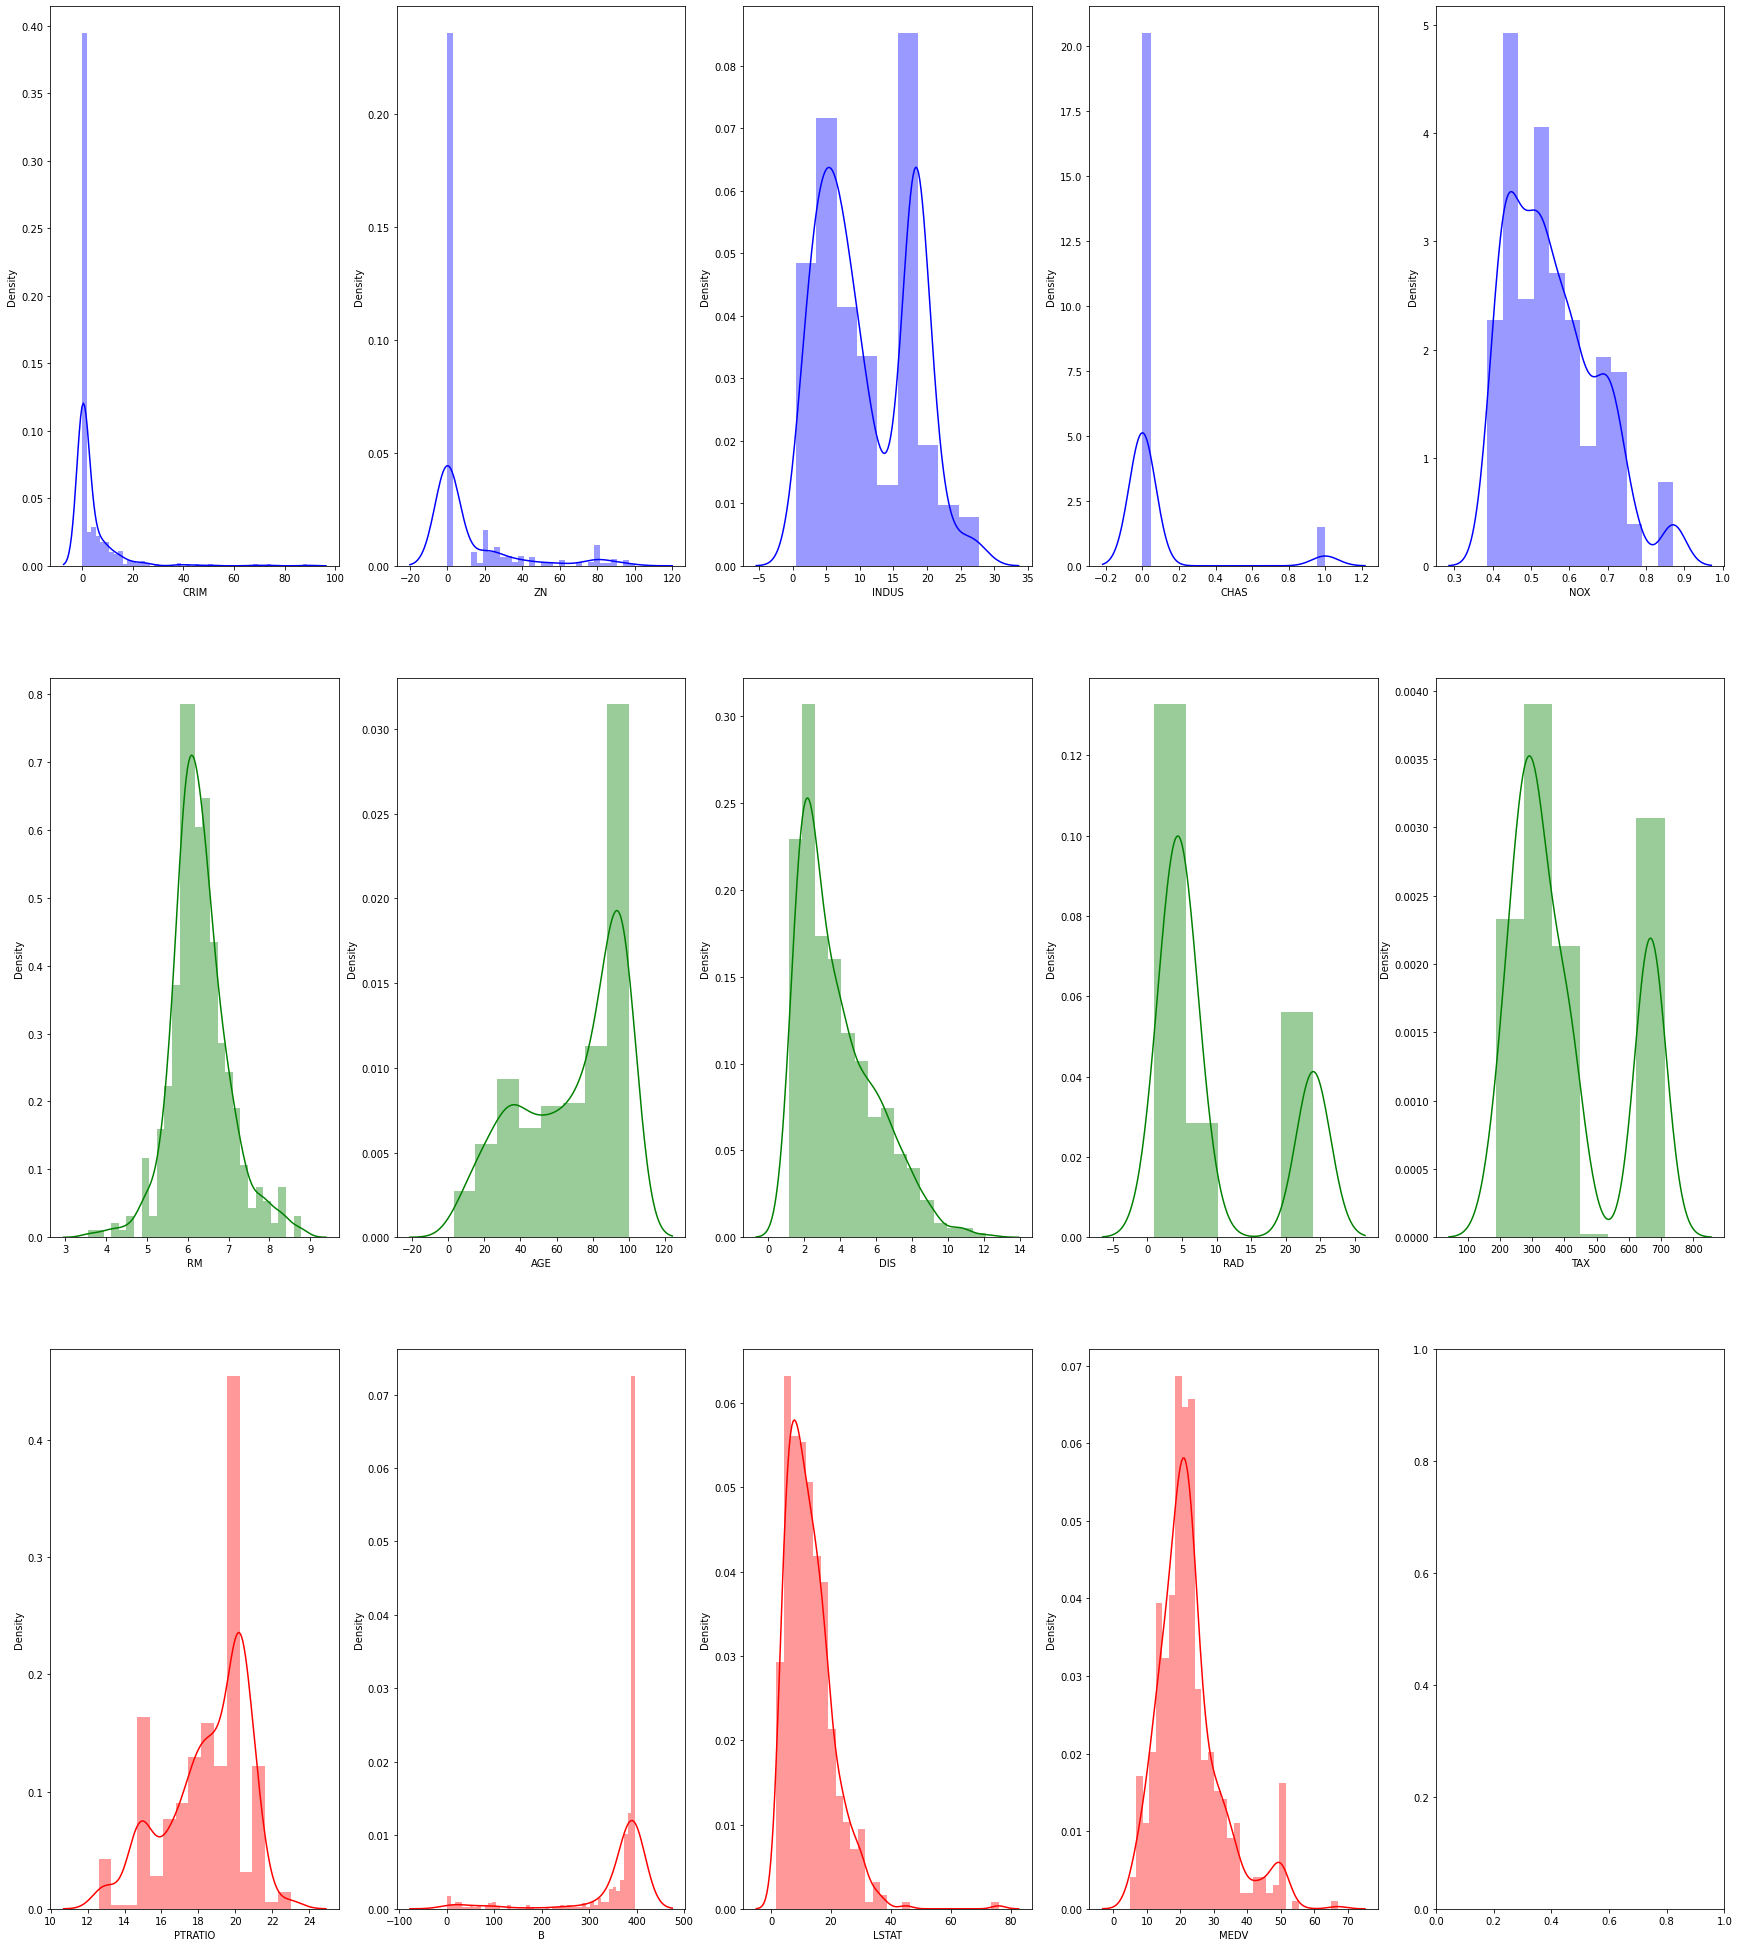

In [17]:
#graphic for visualization
fig, ax = plt.subplots(3,5, figsize=(30,35))

sns.distplot(df['CRIM'], ax=ax[0,0], color='blue');
sns.distplot(df['ZN'], ax=ax[0,1], color='blue');
sns.distplot(df['INDUS'], ax=ax[0,2], color='blue');
sns.distplot(df['CHAS'], ax=ax[0,3], color='blue');
sns.distplot(df['NOX'], ax=ax[0,4], color='blue');
sns.distplot(df['RM'], ax=ax[1,0], color='green');
sns.distplot(df['AGE'], ax=ax[1,1], color='green');
sns.distplot(df['DIS'], ax=ax[1,2], color='green');
sns.distplot(df['RAD'], ax=ax[1,3], color='green');
sns.distplot(df['TAX'], ax=ax[1,4], color='green');
sns.distplot(df['PTRATIO'], ax=ax[2,0], color='red');
sns.distplot(df['B'], ax=ax[2,1], color='red');
sns.distplot(df['LSTAT'], ax=ax[2,2], color='red');
sns.distplot(df['MEDV'], ax=ax[2,3], color='red');

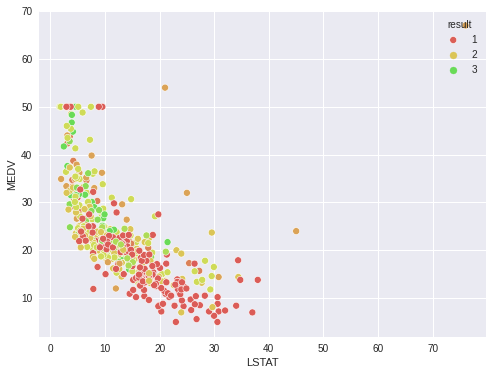

In [24]:
#plotting dataset using matplotlib and seaborn
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = df['LSTAT'], y = df['MEDV'], hue=df['RAD'], palette = 'hls', legend=True)
plt.legend(title='result', loc='upper right', labels=['1', '2', '3']);

In [25]:
#separate the training dataset

x=df.drop("RAD", axis=1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


In [26]:
#separate the test dataset
y=df['RAD']
y.head()

0    1
1    2
2    2
3    3
4    3
Name: RAD, dtype: int64

In [27]:
#split data train and data test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
#check train and tes length
len(x_train), len(x_test), len(y_train), len(y_test)

(357, 154, 357, 154)

In [29]:
#standarization data set
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
#checking NaN value
np.isnan(x_train).any(), np.isnan(y_train).any(), np.isnan(x_test).any()

(True, False, True)

In [38]:
#fixing error NaN value
x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
y_train[np.isnan(y_train)] = np.median(y_train[~np.isnan(y_train)])
x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])

In [39]:
#using logistic regression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
#accuracy
LogisticRegressionScore = model.score(x_test, y_test)
print("Accuracy bay logistic regression : ", LogisticRegressionScore*100)

Accuracy bay logistic regression :  61.68831168831169
